In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | yellowknife
Processing Record 2 of Set 13 | khandbari
Processing Record 3 of Set 13 | airai
Processing Record 4 of Set 13 | punta arenas
Processing Record 5 of Set 13 | mataura
Processing Record 6 of Set 13 | codrington
Processing Record 7 of Set 13 | busselton
Processing Record 8 of Set 13 | saint-philippe
Processing Record 9 of Set 13 | moses lake
Processing Record 10 of Set 13 | ilulissat
Processing Record 11 of Set 13 | upernavik
Processing Record 12 of Set 13 | virginia beach
Processing Record 13 of Set 13 | tuktoyaktuk
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | narsaq
Processing Record 16 of Set 13 | amuntai
Processing Record 17 of Set 13 | faanui
Processing Record 18 of Set 13 | bossembele
City not found. Skipping...
Processing Record 19 of Set 13 | jiaozhou
Processing Record 20 of Set 13 | cape town
Processing Record 21 of Set 13 | iqaluit
Processing Record 2

Processing Record 35 of Set 16 | cayenne
Processing Record 36 of Set 16 | auki
Processing Record 37 of Set 16 | likhoy
Processing Record 38 of Set 16 | klaksvik
Processing Record 39 of Set 16 | soavinandriana
Processing Record 40 of Set 16 | porto murtinho
Processing Record 41 of Set 16 | broken hill
Processing Record 42 of Set 16 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 16 | yeppoon
Processing Record 44 of Set 16 | kaeo
Processing Record 45 of Set 16 | tessalit
Processing Record 46 of Set 16 | luancheng
Processing Record 47 of Set 16 | tabou
Processing Record 48 of Set 16 | mecca
Processing Record 49 of Set 16 | berlevag
Processing Record 50 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 17 | sirnak
Processing Record 2 of Set 17 | urucara
Processing Record 3 of Set 17 | warrnambool
Processing Record 4 of Set 17 | goma
Processing Record 5 of Set 17 | katsuura
Processing Record 6 of Set 17 | visby
Processing Record 7 of Set 

Processing Record 24 of Set 20 | awbari
Processing Record 25 of Set 20 | omurtag
Processing Record 26 of Set 20 | rocha
Processing Record 27 of Set 20 | waingapu
Processing Record 28 of Set 20 | lander
Processing Record 29 of Set 20 | axim
Processing Record 30 of Set 20 | itoman
Processing Record 31 of Set 20 | kloulklubed
Processing Record 32 of Set 20 | hofn
Processing Record 33 of Set 20 | aksarka
Processing Record 34 of Set 20 | fairbanks
Processing Record 35 of Set 20 | karachi
Processing Record 36 of Set 20 | brae
Processing Record 37 of Set 20 | broome
Processing Record 38 of Set 20 | cockburn town
Processing Record 39 of Set 20 | palora
Processing Record 40 of Set 20 | custodia
Processing Record 41 of Set 20 | nantong
Processing Record 42 of Set 20 | zyryanovsk
Processing Record 43 of Set 20 | santa cruz cabralia
Processing Record 44 of Set 20 | zhengjiatun
Processing Record 45 of Set 20 | guarapari
Processing Record 46 of Set 20 | sedam
Processing Record 47 of Set 20 | deputat

Processing Record 8 of Set 24 | umm lajj
Processing Record 9 of Set 24 | dwarka
Processing Record 10 of Set 24 | san jose de tarros
Processing Record 11 of Set 24 | hambantota
Processing Record 12 of Set 24 | severo-yeniseyskiy
Processing Record 13 of Set 24 | amboise
Processing Record 14 of Set 24 | yirol
City not found. Skipping...
Processing Record 15 of Set 24 | razole
Processing Record 16 of Set 24 | pavlovsk
Processing Record 17 of Set 24 | soverato
Processing Record 18 of Set 24 | madimba
Processing Record 19 of Set 24 | kavaratti
Processing Record 20 of Set 24 | kang
Processing Record 21 of Set 24 | moberly
Processing Record 22 of Set 24 | buraydah
Processing Record 23 of Set 24 | beloha
Processing Record 24 of Set 24 | billings
Processing Record 25 of Set 24 | paita
Processing Record 26 of Set 24 | oshakati
Processing Record 27 of Set 24 | abu dhabi
Processing Record 28 of Set 24 | machinga
Processing Record 29 of Set 24 | conceicao do araguaia
Processing Record 30 of Set 24 |

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,45.41,100,90,3.44,CA,2021-09-25 13:14:51
1,Khandbari,27.3747,87.2039,72.01,92,84,0.83,NP,2021-09-25 13:10:20
2,Airai,-8.9266,125.4092,61.25,88,99,1.77,TL,2021-09-25 13:14:51
3,Punta Arenas,-53.1500,-70.9167,41.11,75,75,9.22,CL,2021-09-25 13:10:28
4,Mataura,-46.1927,168.8643,37.47,98,86,3.89,NZ,2021-09-25 13:14:52
5,Codrington,-38.2667,141.9667,47.39,63,78,5.48,AU,2021-09-25 13:14:52
6,Busselton,-33.6500,115.3333,57.04,73,88,12.35,AU,2021-09-25 13:14:53
7,Saint-Philippe,-21.3585,55.7679,74.79,73,51,14.18,RE,2021-09-25 13:14:53
8,Moses Lake,47.1301,-119.2781,54.28,66,1,4.61,US,2021-09-25 13:14:53
9,Ilulissat,69.2167,-51.1000,24.82,46,75,3.44,GL,2021-09-25 13:14:54


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-09-25 13:14:51,62.4560,-114.3525,45.41,100,90,3.44
1,Khandbari,NP,2021-09-25 13:10:20,27.3747,87.2039,72.01,92,84,0.83
2,Airai,TL,2021-09-25 13:14:51,-8.9266,125.4092,61.25,88,99,1.77
3,Punta Arenas,CL,2021-09-25 13:10:28,-53.1500,-70.9167,41.11,75,75,9.22
4,Mataura,NZ,2021-09-25 13:14:52,-46.1927,168.8643,37.47,98,86,3.89


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

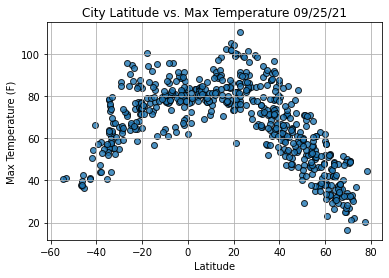

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

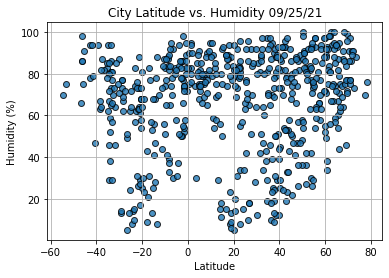

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

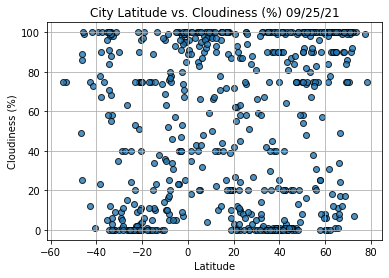

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

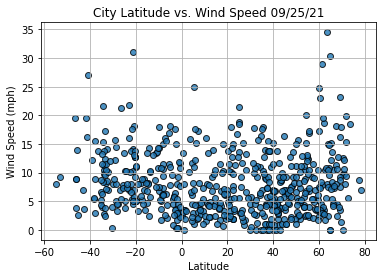

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()